In [2]:
# 导入必要的库
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pycountry
import folium
import requests

# import and show data 
salaries = pd.read_csv("ds_salaries.csv")

# 查看数据摘要
print(salaries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


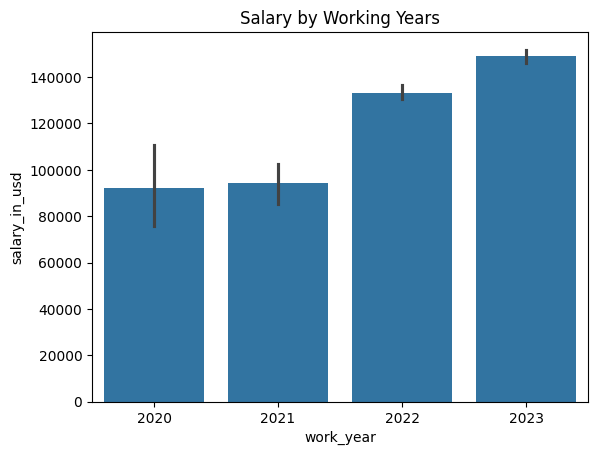

In [20]:

# 数据初步解析


# Bar chart classified by working years
sns.barplot(
    x = 'work_year',
    y = 'salary_in_usd',
    data = salaries,
)
plt.title('Salary by Working Years')

plt.show()

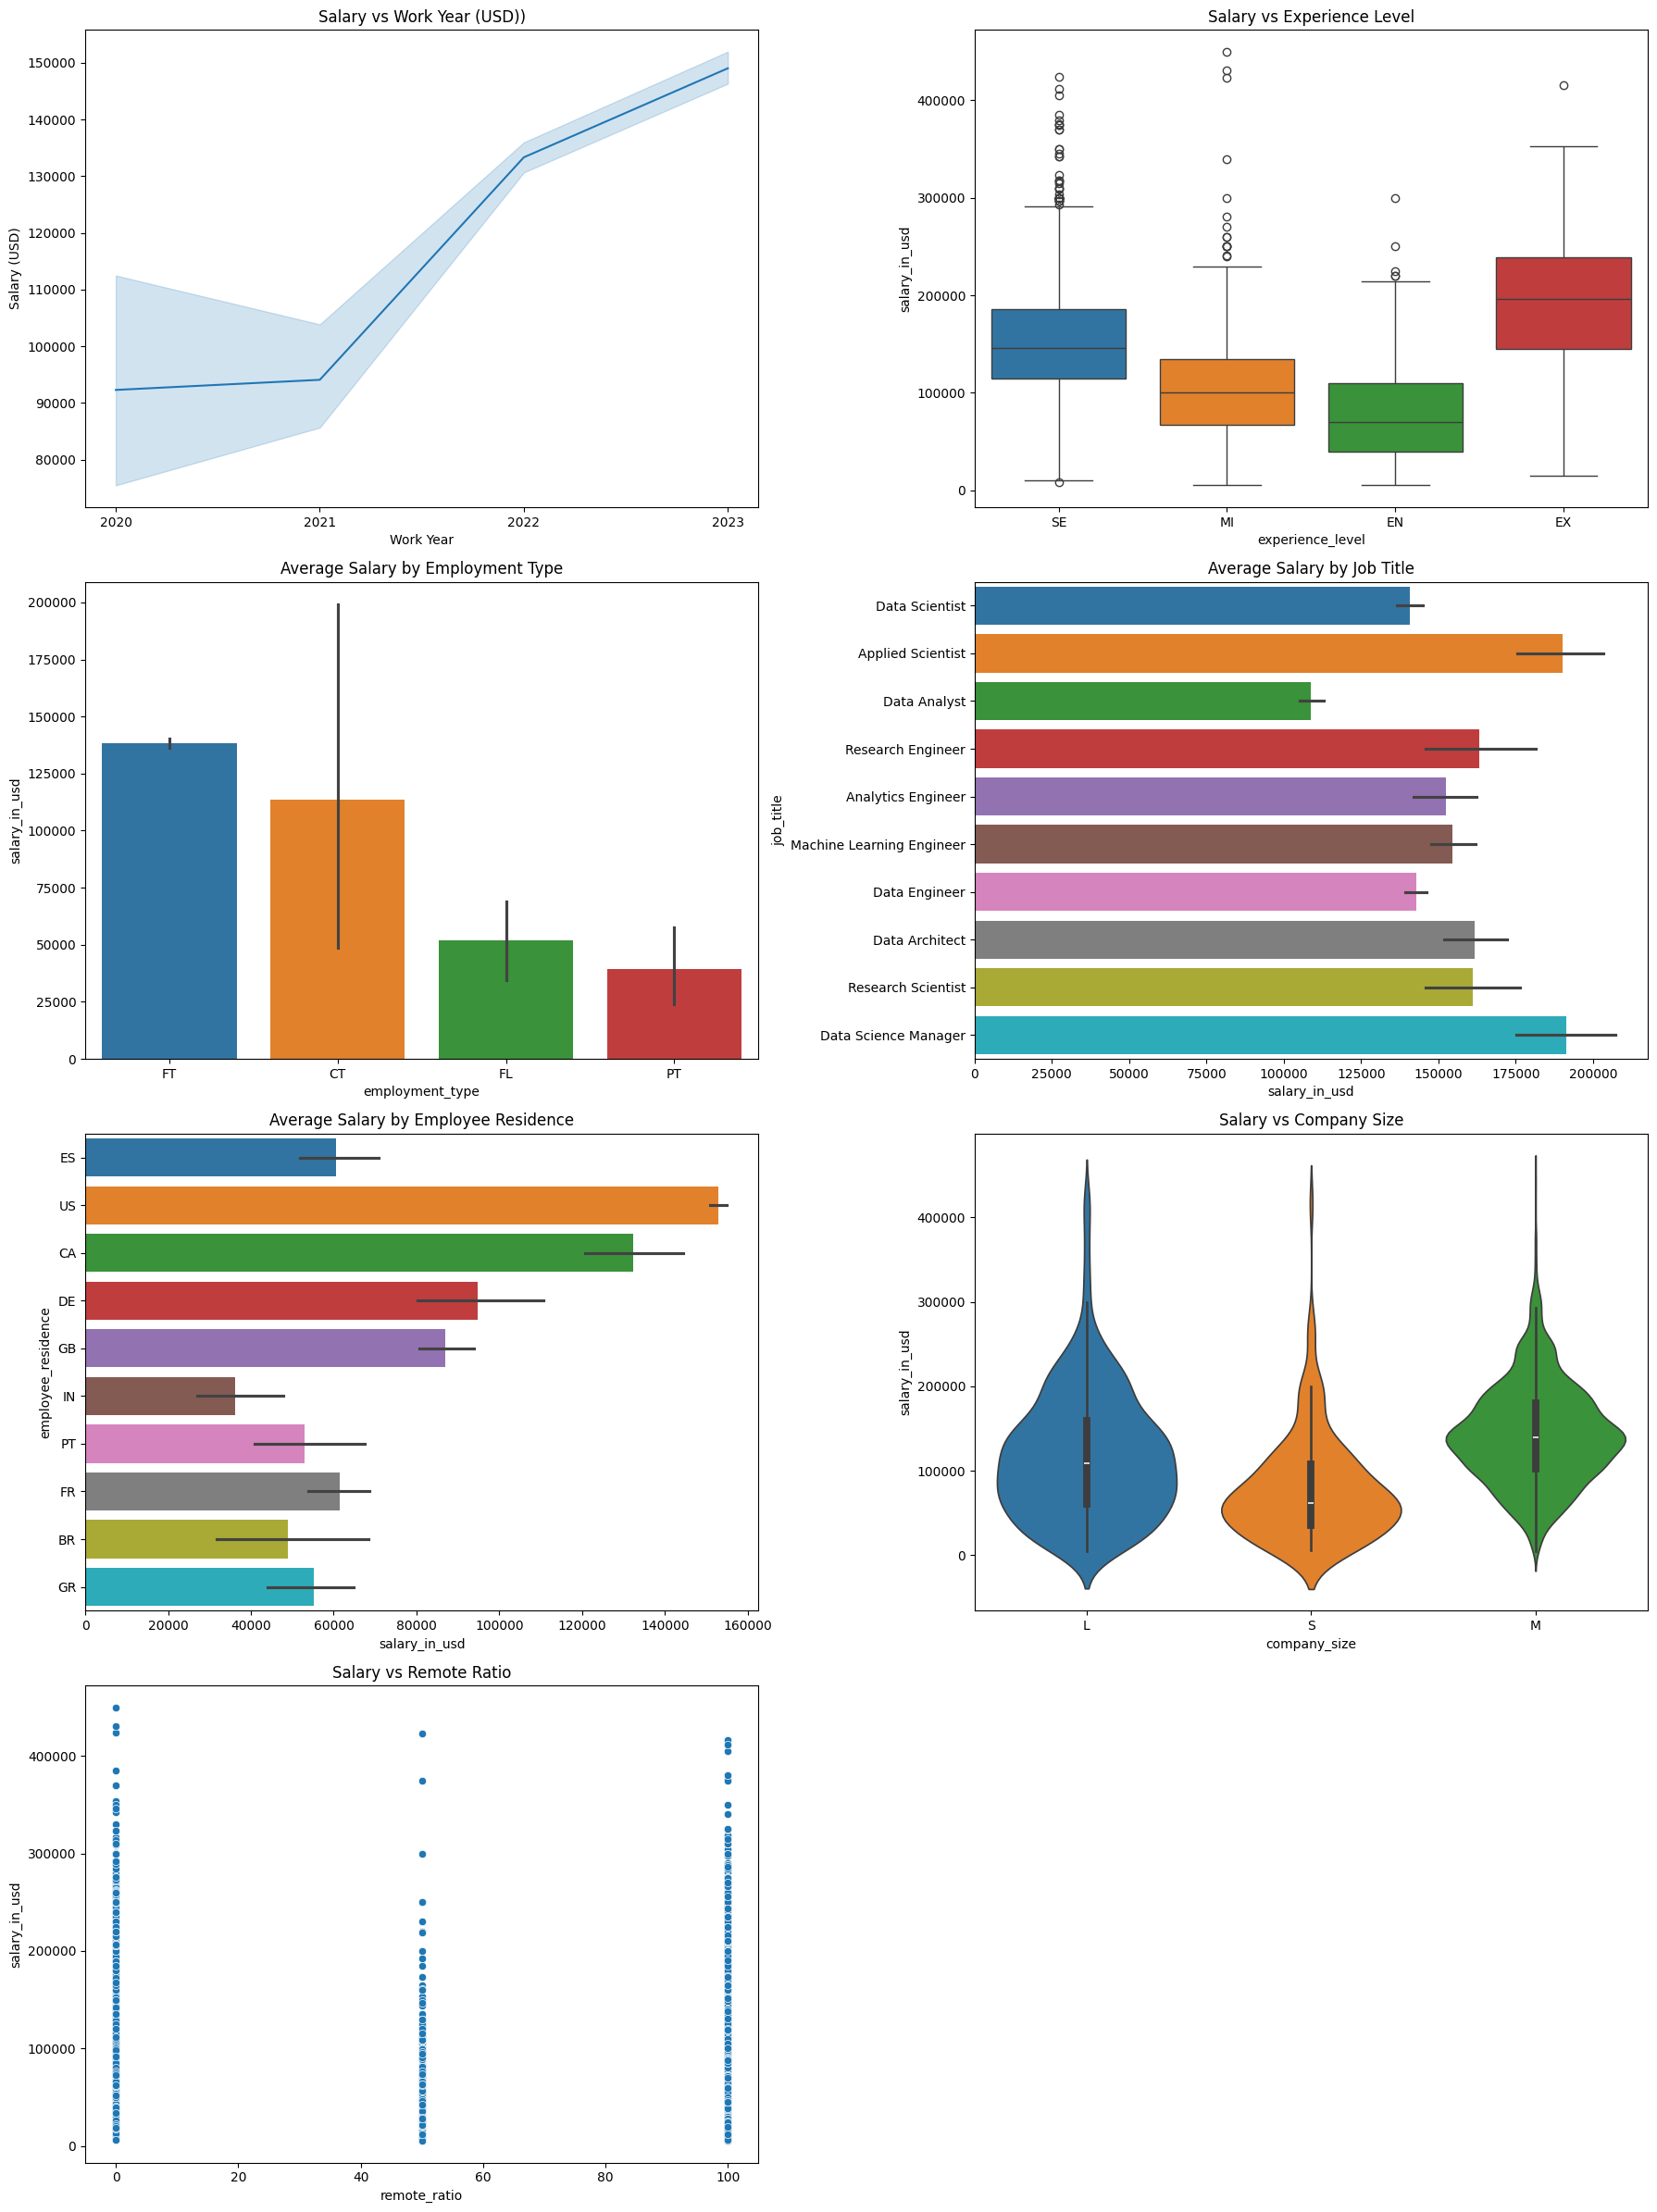

Analysis results:XXXXXXX


In [ ]:
# 分析不同要素对薪资的影响关系
# Analyzing the impact of different factors on salary

# 设置matplotlib图形
# Setting up the matplotlib figure
plt.figure(
    figsize = (18, 24)
)
# 1. 工作年份与薪资
# 1. Work Year vs Salary
plt.subplot(4, 2, 1)
sns.lineplot(
    x='work_year', 
    y='salary_in_usd',
    data=salaries, 
)
plt.xticks(
    salaries['work_year'].unique()   # 设置x轴刻度为工作年份，无小数点
)                                    # Set x-axis ticks to work years, no decimal points
plt.title('Salary vs Work Year (USD))')
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')

# 2. 经验水平 vs 薪资
# 2. Experience Level vs Salary
plt.subplot(4, 2, 2)
sns.boxplot(
    x = 'experience_level',
    y = 'salary_in_usd', 
    data=salaries,
    hue='experience_level'
)
plt.title('Salary vs Experience Level')

# 3. 雇佣类型与薪资
# 3. Employment Type vs Salary
plt.subplot(4, 2, 3)
'''average_salary_by_employment_type = salaries.groupby('employment_type')['salary_in_usd'].mean().sort_values()
sns.barplot(
    x = average_salary_by_employment_type.values,
    y = average_salary_by_employment_type.index,
)'''
plt.subplot(4, 2, 3)
sns.barplot(
    x='employment_type', 
    y='salary_in_usd', 
    data=salaries, 
    hue='employment_type'
)
plt.title('Average Salary by Employment Type')

# 4.职位名称与薪资
# 4. Job Title vs Salary
plt.subplot(4, 2, 4)
top_job_titles = salaries['job_title'].value_counts().head(10).index
'''average_salary_by_job_title = salaries[salaries['job_title'].isin(top_job_titles)].groupby('job_title')['salary_in_usd'].mean().sort_values()
sns.barplot(
    x = average_salary_by_job_title.values,
    y = average_salary_by_job_title.index
)'''
sns.barplot(
    y='job_title',
    x='salary_in_usd', 
    data = salaries[salaries['job_title'].isin(top_job_titles)],
    hue='job_title'
)

plt.title('Average Salary by Job Title')

# 5.员工居住地与薪资
# 5. Employee Residence vs Salary
plt.subplot(4, 2, 5)
top_countries = salaries['employee_residence'].value_counts().head(10).index
'''average_salary_by_country = salaries[salaries['employee_residence'].isin(top_countries)].groupby('employee_residence')['salary_in_usd'].mean().sort_values()
sns.barplot(x=average_salary_by_country.values, y=average_salary_by_country.index)'''
sns.barplot(
    y='employee_residence', 
    x='salary_in_usd', 
    data=salaries[salaries['employee_residence'].isin(top_countries)],
    hue='employee_residence'
)
plt.title('Average Salary by Employee Residence')

# 6. 公司规模 vs 薪资
# 6. Company Size vs Salary
plt.subplot(4, 2, 6)
sns.violinplot(
    x = 'company_size',
    y = 'salary_in_usd', 
    data=salaries,
    hue='company_size'
)
plt.title('Salary vs Company Size')

# 7. 远程比例 vs 薪资
# 7. Remote Ratio vs Salary
plt.subplot(4, 2, 7)
sns.scatterplot(
    x = 'remote_ratio',
    y = 'salary_in_usd', 
    data=salaries
)
plt.title('Salary vs Remote Ratio')

# 图片展示
# show pictures
plt.tight_layout()
plt.show()


# 打印结论
# Print the conclusion
print("Analysis results:XXXXXXX")


In [ ]:
# Function to map country codes to ISO Alpha-3 codes
def map_country_codes(country_codes):
    mapping = {}
    for code in country_codes:
        country = pycountry.countries.get(alpha_2=code)
        if country:
            mapping[code] = country.alpha_3
        else:
            country = pycountry.countries.get(name=code)
            if country:
                mapping[code] = country.alpha_3
            else:
                mapping[code] = code
    return mapping


# Get unique country codes
unique_worker_countries = salaries['employee_residence'].unique()
unique_company_countries = salaries['company_location'].unique()
all_unique_countries = set(unique_worker_countries) | set(unique_company_countries)

# Generate country code mapping
country_code_to_iso = map_country_codes(all_unique_countries)

# Apply the mapping to the dataset
salaries['employee_residence_iso'] = salaries['employee_residence'].map(country_code_to_iso)
salaries['company_location_iso'] = salaries['company_location'].map(country_code_to_iso)

# Display the mapping and the first few rows of the updated dataset
country_code_to_iso, salaries.head()


({'GH': 'GHA',
  'UZ': 'UZB',
  'JP': 'JPN',
  'SK': 'SVK',
  'SG': 'SGP',
  'IT': 'ITA',
  'NZ': 'NZL',
  'TR': 'TUR',
  'HU': 'HUN',
  'PR': 'PRI',
  'AS': 'ASM',
  'BE': 'BEL',
  'NG': 'NGA',
  'TN': 'TUN',
  'AR': 'ARG',
  'MD': 'MDA',
  'IE': 'IRL',
  'DO': 'DOM',
  'AM': 'ARM',
  'RS': 'SRB',
  'DE': 'DEU',
  'CA': 'CAN',
  'SE': 'SWE',
  'HK': 'HKG',
  'IQ': 'IRQ',
  'NL': 'NLD',
  'LU': 'LUX',
  'RU': 'RUS',
  'SI': 'SVN',
  'AT': 'AUT',
  'EE': 'EST',
  'AU': 'AUS',
  'TH': 'THA',
  'CN': 'CHN',
  'DZ': 'DZA',
  'ES': 'ESP',
  'PT': 'PRT',
  'MA': 'MAR',
  'BS': 'BHS',
  'BO': 'BOL',
  'LV': 'LVA',
  'KW': 'KWT',
  'GR': 'GRC',
  'UA': 'UKR',
  'MT': 'MLT',
  'ID': 'IDN',
  'US': 'USA',
  'IN': 'IND',
  'BG': 'BGR',
  'CH': 'CHE',
  'MY': 'MYS',
  'LT': 'LTU',
  'JE': 'JEY',
  'CZ': 'CZE',
  'AL': 'ALB',
  'KE': 'KEN',
  'HN': 'HND',
  'EG': 'EGY',
  'MK': 'MKD',
  'IR': 'IRN',
  'IL': 'ISR',
  'PK': 'PAK',
  'CF': 'CAF',
  'FI': 'FIN',
  'GB': 'GBR',
  'MX': 'MEX',
  'PL': 'P

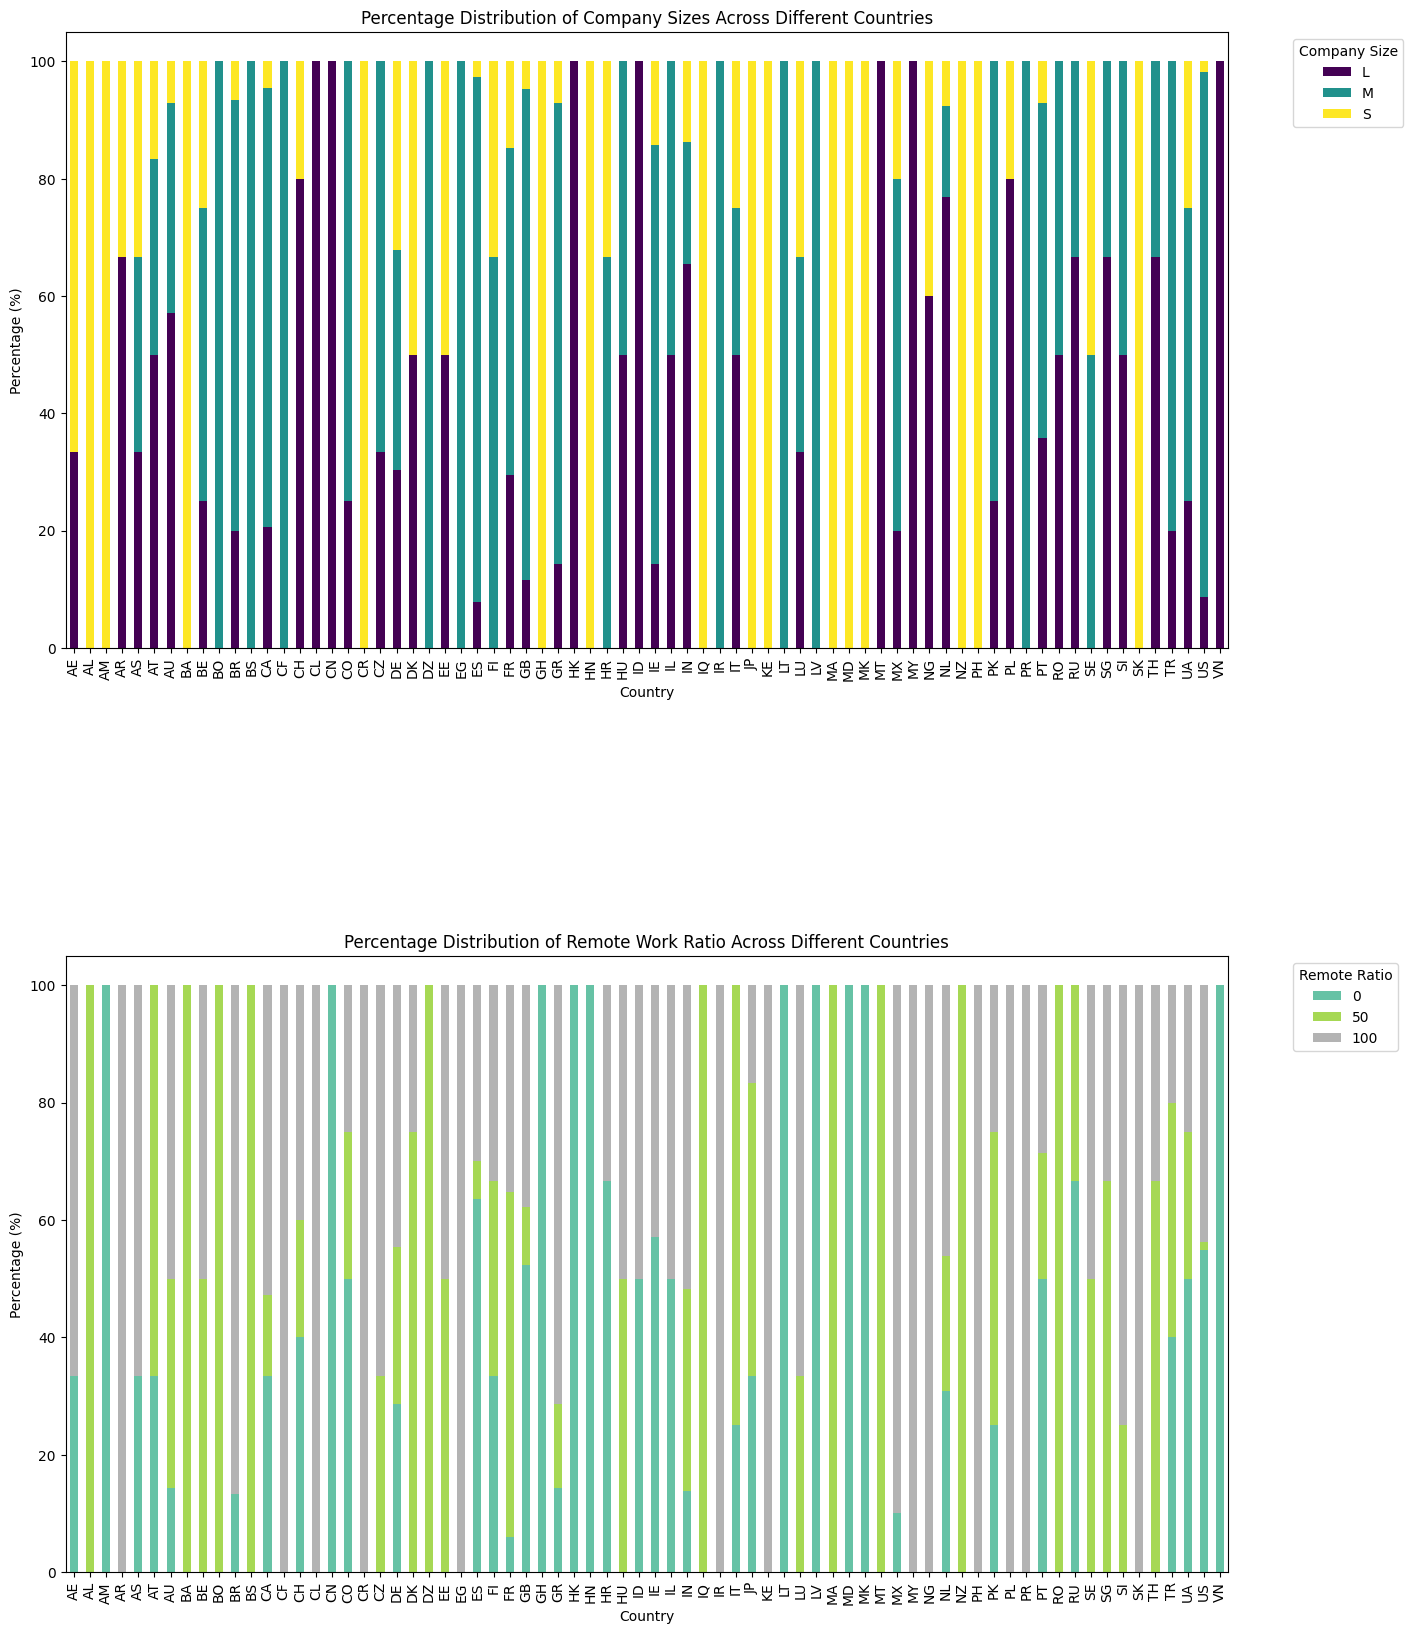

In [17]:

# Preparing data for the first visualization (stacked bar chart for company sizes)
company_distribution = salaries.groupby(['company_location', 'company_size']).size().unstack(fill_value=0)
stacked_bar_data = company_distribution.div(company_distribution.sum(axis=1), axis=0) * 100  # Convert to percentage

# Preparing data for the second visualization (percentage of remote workers by country)
remote_distribution = salaries.groupby(['company_location', 'remote_ratio']).size().unstack(fill_value=0)
remote_percentage_data = remote_distribution.div(remote_distribution.sum(axis=1), axis=0) * 100  # Convert to percentage

# Adjusting the layout to display the charts one above the other
plt.figure(figsize=(15, 20))

# First Plot (Company Sizes)
plt.subplot(2, 1, 1)  # This will be the first plot in a 2x1 grid
stacked_bar_data.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Percentage Distribution of Company Sizes Across Different Countries')
plt.ylabel('Percentage (%)')
plt.xlabel('Country')
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)

# Second Plot (Remote Ratios)
plt.subplot(2, 1, 2)  # This will be the second plot in a 2x1 grid
remote_percentage_data.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
plt.title('Percentage Distribution of Remote Work Ratio Across Different Countries')
plt.ylabel('Percentage (%)')
plt.xlabel('Country')
plt.legend(title='Remote Ratio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)

# 调整子图之间的垂直间距
plt.subplots_adjust(hspace=0.5)

plt.show()


In [ ]:


# 计算每个国家的平均工资
average_salary_by_country = salaries.groupby('employee_residence_iso')['salary_in_usd'].mean().reset_index()

# 加载 GeoJSON 数据（用于在地图上绘制国家边界）
geojson_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
geojson_data = requests.get(geojson_url).json()

# 创建基础地图
m = folium.Map(location=[0, 0], zoom_start=2, min_zoom=2, max_bounds=True, min_lon=-180, max_lon=180, min_lat=-90, max_lat=90)

# 添加国家边界和工资数据到地图
for country in geojson_data['features']:
    iso_code = country['id']
    avg_salary = average_salary_by_country[average_salary_by_country['employee_residence_iso'] == iso_code]['salary_in_usd'].mean()
    if pd.notna(avg_salary):
        folium.GeoJson(
            country,
            style_function=lambda x, avg_salary=avg_salary: {
                'fillColor': 'green' if avg_salary > 50000 else 'orange' if avg_salary > 20000 else 'red',
                'color': 'black',
                'weight': 1,
                'fillOpacity': 0.7,
                'lineOpacity': 0.2
            },
            tooltip=folium.GeoJsonTooltip(fields=['name'], aliases=[f'Average Salary: ${avg_salary:.2f}'])
        ).add_to(m)

# 显示地图
m.save('C:/Users/fairy/Desktop/assessment2programming/salarymap.html')  # 保存地图为 HTML 文件

